<a href="https://colab.research.google.com/github/SaW2017/ClearingDesire_AI_ML/blob/master/Yolo3try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Setup YOLO and Darknet in Google-Colab, because I don`t have a great GPU
# and with google colab the use is free up to 12 hours at a time
# after that the runtime-environment get destroyed and with it every variable
# thats why I connect to my drive for some data

In [65]:
# check current CUDA version to know which cuDNN I have to download 
# !/usr/local/cuda/bin/nvcc --version

In [66]:
# I`m unzipping the cuDNN files from my Drive folder directly to the VM CUDA folders
# !tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
# !chmod a+r /usr/local/cuda/include/cudnn.h

In [67]:
# test the version
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

# if not working does this to check if file is there
# !cat /usr/local/cuda/include/cudnn.h

In [68]:
# update everything to run in no further problems
!apt-get update
!apt-get upgrade

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 

In [69]:
# openCV has a lot of dependecies and after a long series of trial and error
# there's some things I need to install first
# install dependencies for openCV
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-dev is already the newest version (2.24.32-1ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [70]:
# more things one needs to install
!apt-get install libavcodec-dev libavformat-dev libswscale-d

# install cmake
# CMake is cross-platform free and open-source software for build automation,
# testing and packaging using a compiler-independent method.
# CMake is not a build system but rather it's a build-system generator.
# It supports directory hierarchies and applications that depend on multiple libraries.
!apt-get -y install cmake
!which cmake

!cmake --version

# install OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [71]:
# git clone Darknet fork from AlexeyAB -> github-Repo
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 10.16 MiB/s, done.
Resolving deltas: 100% (9994/9994), done.


In [72]:
# install vim because cat throws an error and I want to check if
# I successfully changed the makefile
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
vim is already the newest version (2:8.0.1453-1ubuntu1.4).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [73]:
# watch makefile, but don`t forget to stop the cell manually
%cd darknet
#!vim Makefile

/content/darknet/darknet_scripts/darknet


In [74]:
# Download the Yolo-Weights from the official Website
# allos to detect on 80 different classes right from the start
!ls
#!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       vcpkg.json
cfg		data			net_cam_v3.sh	       video_yolov3.sh
cmake		image_yolov3.sh		net_cam_v4.sh	       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		README.md
--2021-02-20 12:35:01--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  19.8MB/s    in 13s     

2021-02-20 12:35:15 (18.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [75]:
# edit the makefile to enable opencv support and gpu support with changing to 1
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [76]:
# check if changing the makefile worked, Don't forget to stop cell manually
#!vim Makefile

In [77]:
# changing to parent directory
%cd ..
!ls

/content/darknet/darknet_scripts
convert.py			       loss_plot.jpg
convert_yolo_prediction_to_caltech.py  plot_dataset_distribution.py
darknet				       plot_yolo_log.py
draw_precision_recall_curve.py	       README.md
gen_anchors.py			       visualize_anchors.py
generated_anchors


In [78]:
# g++ command is a GNU c++ compiler invocation command, 
# which is used for preprocessing, compilation, assembly and 
# linking of source code to generate an executable file
# g++  >> command allow us to stop this process at the intermediate stage
!apt install g++-5

# install the 5th version of g++ & gcc
# GNU Compiler Collections which is used to compile mainly C and C++ language.
# gcc  >> command allow us to stop the compilation process at different stages
!apt install gcc-5

# and do the updates
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [79]:
# I'm unzipping the cuDNN files from my Drive folder directly to the VM CUDA folders
#!tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
#!chmod a+r /usr/local/cuda/include/cudnn.h
# check if its worked
#!cat /usr/local/cuda/include/cudnn.h

In [80]:
# install CUDA to speed up the performance 
# install it in a different way
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

# install compilers
!apt-get install cuda -y -qq 
# update and install 
!apt update
!apt upgrade
# have to install this too, otherwise its not working
!apt install cuda-8.0 -y

6 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2021-02-20 12:35:27--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.16.29
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.16.29|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2021-02-20 12:35:28--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?XgBczB43ou

In [81]:
# make sure that the GPUs are working DONT FORGET TO SWITCH NOTEBOOK on GPU!!!!
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)
print("is working?!")

# check cuda version
!/usr/local/cuda/bin/nvcc --version


is working?!
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [82]:
# after everything got installed: and changing the makefile
# --> run the make command
# buil darknet and installing all the dependencies from the binary files
%cd darknet
!make

/content/darknet/darknet_scripts/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-

In [83]:
!ls
#check if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md
CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Feb 20 2021 - 12:37:00 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Bad file descriptor
darknet: ./src/utils.c:331: error: Assertion `0' failed.


In [84]:
#defining some functions that will -> show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)



In [85]:
# there
#imShow('predictions.jpg')

In [86]:
# This cell imports the drive library and mounts our Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/MyDrive/"
# we need this because our files are there

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
# Not Necessary cell
# List the content of my drive folder 
!ls '/content/gdrive/MyDrive/yolov3/'

 backup
 charts
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 generate_train.py
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [88]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/yolov3/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/yolov3 /mydrive
!ls /mydrive 

ln: failed to create symbolic link '/mydrive/yolov3': File exists
 backup
 charts
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 generate_train.py
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [89]:
# run darknet command with google drive image (my path to thge example image is /darknet/pictures/airplane_0.jpg)
# to check if this is working
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/darknet/pictures/airplane_0.jpg
imShow('predictions.jpg')

[Errno 20] Not a directory: 'darknet'
/content/darknet/darknet_scripts/darknet
CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Feb 20 2021 - 12:37:00 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Bad file descriptor
darknet: ./src/utils.c:331: error: Assertion `0' failed.


In [90]:
# GOOGLE DRIVE DOWNLOAD to have the results - dont forget collab will be deleted after 12 hours
# change the image name - how it will be saved as 
!cp predictions.jpg /mydrive/images/detection1.jpg

cp: cannot stat 'predictions.jpg': No such file or directory


In [91]:
## Start to train my model
# state class in ...

In [92]:
# this is where the zip with the pictures and txt files is stored
!ls /mydrive/yolov3

 backup
 charts
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 generate_train.py
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [93]:
# copy the zip file into the root directory of the VM, Zip because faster transfer 
!cp /mydrive/yolov3/obj.zip ../

In [94]:
# unzip the zip file and its contents (images & txt) should now be
# in /darknet/data/obj
!unzip ../obj.zip -d data/

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: data/labels/airplane_1332.txt  
  inflating: data/labels/airplane_1333.jpg  
  inflating: data/labels/airplane_1333.txt  
  inflating: data/labels/airplane_1334.jpg  
  inflating: data/labels/airplane_1334.txt  
  inflating: data/labels/airplane_1335.jpg  
  inflating: data/labels/airplane_1335.txt  
  inflating: data/labels/airplane_1336.jpg  
  inflating: data/labels/airplane_1336.txt  
  inflating: data/labels/airplane_1337.jpg  
  inflating: data/labels/airplane_1337.txt  
  inflating: data/labels/airplane_1338.jpg  
  inflating: data/labels/airplane_1338.txt  
  inflating: data/labels/airplane_1339.jpg  
  inflating: data/labels/airplane_1339.txt  
  inflating: data/labels/airplane_134.jpg  
  inflating: data/labels/airplane_134.txt  
  inflating: data/labels/airplane_1340.jpg  
  inflating: data/labels/airplane_1340.txt  
  inflating: data/labels/airplane_1341.jpg  
  inflating: data/labels/airplane_1

In [95]:
# First change the Yolov3 config File
# darknet --> cfg --> yolov3.cfg

# 1.
# commend testing: batch & subdivisions lines!
# uncommend Training-Lines
# batch=64
# subdivisions=16    --> if there`s a CUDA Error then rise 16 - 32 if this is 
# still not working then up tp 64!

# 2.
# change max_batches  --> how many times our training is going to run through
# the data: its like 2000 * classes you have (we have just one - airplane, 
# but the minimum should be 4000 - for enough time to train the model) 

# 3. 
# change steps to 80% of the max batches and 90 % of the mac batches
# our case: steps=3200,3600

# Step 4. and 5. for EVERY YOLO-Layer in the cfg file  (3 layers!)

# 4.
# [yolo] --> this defines our yolo-layers within our network
# set Classes 80 to 1 (airplane)

# 5.
# [convolutional] 
# change the filters from 255 to 18
# according to this equation:
# filters = (classes +5) *3  [convolutional] before each [yolo] layer
# classes=1 --> filters = 18  (classes 3 -> filters = 24)

# 6. (optional) if you`re getting a out of memory error
# ctrl + F (random)
# setting each random to 0!
# because random 1 resize every image as it trains it
# that it doesnt overfit 416x416 image
# because it resizes every image before the training

# Finally
# save file as yolov3-custom.cfg

In [96]:
# Create new files:
# obj.names  -> with our name in it for the class  (airplane)
# obj.data  -> to specifiy:
# how many classes
# where to find our training data...
# 
#classes = 1
#train = data/train.txt   Path from the root of the yolov3 folder
#valid = data/test.txt    Name of the images to use for training/testing
#names = data/obj.names   
#backup = /mydrive/yolov3/backup/   --> to save our custom weights! Create this folder!

In [97]:
# upload the obj.names and obj.data files to the cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [98]:
# upload also the custom.config to the VM
!cp /mydrive/yolov3/yolov3-custom.cfg  ./cfg

In [99]:
# Generating the train.txt --> has to be filled with the relative paths to the pictures
# check before if darknet/data/obj exists
import os

image_files = []
os.chdir(os.path.join("data", "labels"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/labels/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [100]:
# verify if train.txt is now in the data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
coco.names  goal.txt	 labels			   person.jpg
dog.jpg     horses.jpg	 obj.data		   scream.jpg


In [101]:
# Download pre-trained weights for the convolutional layers
# after some research I found out that  the convolutional layers of the
# YOLOv3 network (weights) help that my custom object detector has to be trained 
# less and is more accurate --> helps model to converge - automatically scopes 
# out the model architecture for me, model doesn`t have to start from the scratch
# it`s building off of these weights which are neraly optimal for each layer
# it`s not like the weights to detect the classes ! the layers themselves will 
# learn these weights over time we just use this one, that the model doesn`t have
# to learn them
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-02-20 12:38:41--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.3MB/s    in 8.4s    

2021-02-20 12:38:50 (18.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [102]:
# Create Link to Folder for Chart png - only at first run
# !ln -s "/mydrive/yolov3/charts" charts 

In [103]:
# change the saving path of charts. It will look for the string 'chart.png' in image_opencv.cpp file 
# and change it to charts/chart.png. Charts is the directory that we linked in the previous command.
!sed -i 's/chart.png/charts\/chart.png/g' src/image_opencv.cpp

In [104]:
######## START Training my custom Yolov3 airplane detector

In [105]:
# (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
# RUN the training
#!./darknet detector train ./data/obj.data ./cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

# Resume Training after Timeout
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-custom_last.weights -map -dont_show > /mydrive/backup/log.txt

CUDA Error: no CUDA-capable device is detected: Bad file descriptor
darknet: ./src/utils.c:331: error: Assertion `0' failed.
/bin/bash: line 1: 15781 Aborted                 (core dumped) ./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-custom_last.weights -map -dont_show > /mydrive/backup/log.txt


In [106]:
#imShow('chart.png')

!ls -a

#!vim /mydrive/yolov3/backup/log.txt
!ls -a /mydrive/yolov3/backup





.	   cmake		   .github		  obj
..	   CMakeLists.txt	   .gitignore		  README.md
3rdparty   darknet		   image_yolov3.sh	  results
backup	   darknet53.conv.74	   image_yolov4.sh	  scripts
build	   DarknetConfig.cmake.in  include		  src
build.ps1  darknet_images.py	   json_mjpeg_streams.sh  .travis.yml
build.sh   darknet.py		   LICENSE		  vcpkg.json
cfg	   darknet_video.py	   Makefile		  video_yolov3.sh
charts	   data			   net_cam_v3.sh	  video_yolov4.sh
.circleci  .git			   net_cam_v4.sh	  yolov3.weights
log.txt			    yolov3-custom_4000.weights
yolov3-custom_1000.weights  yolov3-custom_final.weights
yolov3-custom_2000.weights  yolov3-custom_last.weights
yolov3-custom_3000.weights


In [107]:
# Try to show the plot of training loss 
# therefore clone the darknet repo and run the python script
!git clone https://github.com/vovaekb/darknet_scripts.git


Cloning into 'darknet_scripts'...
remote: Enumerating objects: 645, done.
remote: Total 645 (delta 0), reused 0 (delta 0), pack-reused 645
Receiving objects: 100% (645/645), 11.57 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [108]:
# change into right folder and run the script
%cd darknet_scripts/

/content/darknet/darknet_scripts/darknet/darknet_scripts


In [109]:
#finally run the script
!python plot_yolo_log.py /mydrive/yolov3/backup/log.txt

In [110]:
!ls -a


.				       .git
..				       loss_plot.jpg
convert.py			       plot_dataset_distribution.py
convert_yolo_prediction_to_caltech.py  plot_yolo_log.py
draw_precision_recall_curve.py	       README.md
gen_anchors.py			       visualize_anchors.py
generated_anchors


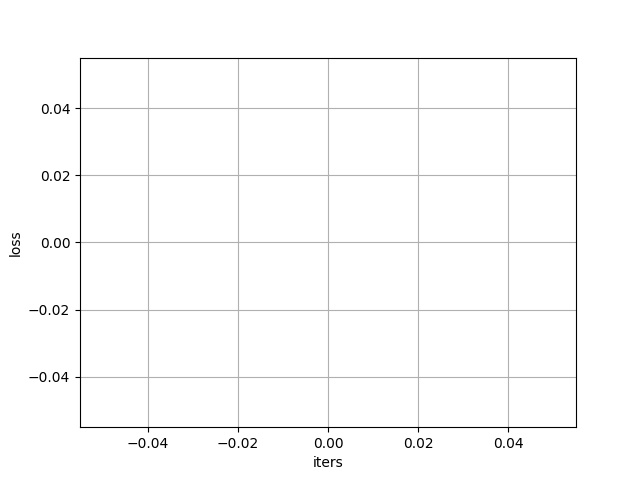

In [111]:
# this scripts generates loss_plot.jpg  -> show it
%matplotlib inline
from IPython.display import Image
Image('/mydrive/backup/loss_plot.jpg')
Image('./loss_plot.jpg')

In [112]:
!ls /mydrive/yolov3/backup

log.txt			    yolov3-custom_4000.weights
yolov3-custom_1000.weights  yolov3-custom_final.weights
yolov3-custom_2000.weights  yolov3-custom_last.weights
yolov3-custom_3000.weights
